Before beginning this exercise you must download some data files, which can be retrieved from here: 

https://northwestern.box.com/s/rsb5wjb7dztg2128flzgex4fmq19havu

Be sure to move the corresponding files to the directory where you are running this notebook. Furthermore, you will need to provide the path to these data as the variable `dataDir`, below.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from rhlUtils import BBox, CCD, Image, imshow

%matplotlib notebook 
%config InlineBackend.figure_format = 'retina'

#%matplotlib qt
#%gui qt

dataDir = '/Users/alcorn/Github/LSSTC-DSFP-Sessions/Session5/Day1/'
mag0 = 33   # Magnitude of an object with 1 detected photon

We have provided three images containing stars, taken with 3 different CCDs, in "stars_X.npz" where X = 0, 1, 2.
The true magnitudes of all the stars are also known, taken from a reliable reference catalogue.

OK, I'll be honest; these are simulations.  The stars' centers are all at centres of pixels
make your lives easier; there is no spatial structure in the PSF; and there is also no noise added of any kind.  You may buy me a drink later.

To read the image data and the calibs say something like:

In [3]:
data = np.load(os.path.join(dataDir, "stars_0.npz"))
image, calibs = data["image"], data["calibs"]

image0 = image.copy()    # Keep a copy

Just to make sure that we're all on the same page, here's code to display the image and stars (imshow is a simple utility imported from rhlUtils -- feel free to use plt.imshow if you'd rather)

<IPython.core.display.Javascript object>


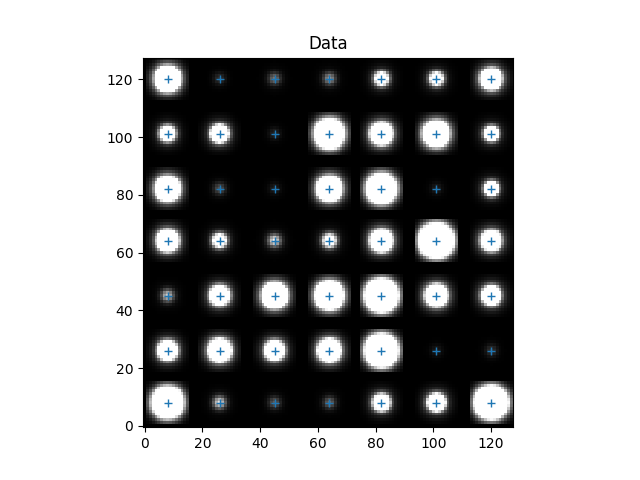

In [4]:
plt.figure(1)
plt.clf()
imshow(image, vmin=0, vmax=1000)
plt.title("Data")

plt.plot(calibs[:, 0], calibs[:, 1], '+')   # calibs[:, 2] contains the object's magnitude (not flux)

plt.show()

Time for you to do some work.  Write some code to estimate a PSF model by simply averaging all the objects, giving each equal weight.  You should add the option to use only some subset of the stars (e.g. the faintest 25%).

Your model should simply be an image of the PSF, normalised to have a maximum value of 1.0

You could use the calibs object to find all the stars, but in the real world there are stars in the data that are
not in the catalogue so you'll have to write a simple object finder (i.e. don't use the calibs!).  It's sufficient to find pixels that are larger than any neighbours to the left, right, top, or bottom; no, this isn't quite how you'd do it in the real world but it's not far off.

I told you that there were three data sets, taken in different places on the sky and with CCDs with different properties.  Choose one set (e.g. "stars_0.npz") to carry out the following activities, then go back and look at the other two.

0 8 8
1 26 8
2 45 8
3 64 8
4 82 8
5 101 8
6 120 8
7 8 26
8 26 26
9 45 26
10 64 26
11 82 26
13 120 26
14 8 45
15 26 45
16 45 45
17 64 45
18 82 45
19 101 45
20 120 45
21 8 64
22 26 64
23 45 64
24 64 64
25 82 64
26 101 64
27 120 64
28 8 82
29 26 82
30 45 82
31 64 82
32 82 82
33 101 82
34 120 82
35 8 101
36 26 101
37 45 101
38 64 101
39 82 101
40 101 101
41 120 101
42 8 120
43 26 120
44 45 120
45 64 120
46 82 120
47 101 120
48 120 120


<IPython.core.display.Javascript object>


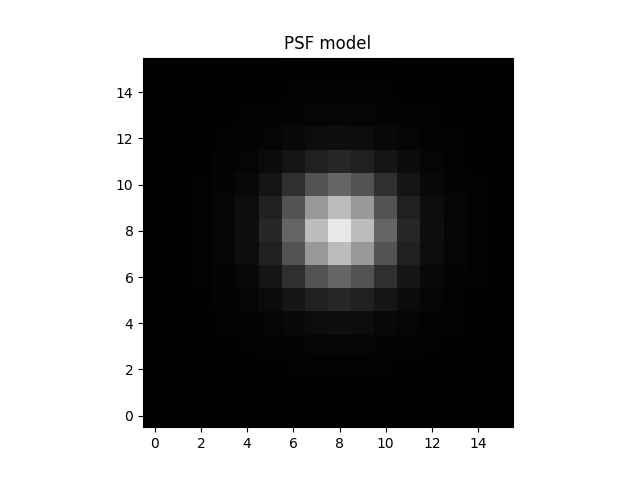

In [30]:
image = image0.copy()
useimages=np.where(calibs[:, 2]<np.max(calibs[:, 2]))[0]
cut=128//7//2-1
psfIm=np.zeros([16,16])
for star in useimages:
    x=int(calibs[star, 0])
    y=int(calibs[star, 1])
    print(star,x,y)
    psfIm+=image[x-cut:x+cut,y-cut:y+cut]

psfIm/=np.max(psfIm)
plt.figure(2)
plt.clf()
imshow(psfIm, vmin=0, vmax=1.1)
plt.title("PSF model")
plt.show();

OK, now use your PSF model to create an image of the residuals created by subtracting the scaled PSF from the stars.

How does it look?  Do you see what's going on?  Remember, I said that the PSF isn't a function of position, but CCDs aren't perfect.

<IPython.core.display.Javascript object>


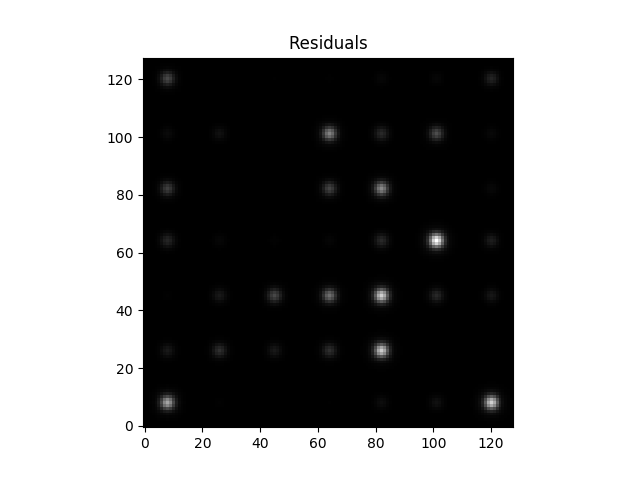

In [28]:
image = image0.copy()

for star in useimages:
    x=int(calibs[star, 0])
    y=int(calibs[star, 1])
    image[x-cut:x+cut,y-cut:y+cut]-=psfIm

plt.figure(3)
plt.clf()
imshow(image, vmin=image.min(), vmax=image.max()) # , vmin=0, vmax=100)
plt.title("Residuals")
plt.show();

A powerful diagnostic is to measure the fluxes of the objects in different ways, and compare with the truth (i.e. the
magnitudes given in the calibs data structure).

For the purpose of this exercise you should use:
- aperture fluxes (the sum of all the pixels in a square centred on the star is good enough)
- psf fluxes (the flux in the best-fit PSF model, $\phi$.  The amplitude is simply $A = \frac{\sum \phi I}{\sum \phi^2}$, and the flux is $A \sum \phi$)

Convert them to magnitudes using the known zero-point mag0 (the magnitude corresponding to one count), and make suitable plots.

What do you think is going on?  Are there other measurements that you can make on the data to test your hypotheses?  Are there other observations that you'd like (I might be able to make them for you).